In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [68]:
doc = pd.read_csv("/Users/abhinavpathak/Downloads/" + 'DS_interview_doc.csv')
paid_unlock = pd.read_csv("/Users/abhinavpathak/Downloads/" + 'DS_interview_paid_unlock.csv')

In [69]:
print(doc.shape)
print(paid_unlock.shape)
doc.head()

(10000, 18)
(38868, 3)


,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,is_mcq,top_keywords,language,course_id_,user_id_
0,880,2017-11-19,2017-11,48940,docx,United States,Fordham University,HIGHER,17901.0,accounting,paper,4.0,0.95683,NaN,1,NaN,0,0
1,881,2016-06-10,2016-06,5336,docx,United States,Rio Salado Community College,HIGHER,6086.0,economics,paper,1.0,0.77776,NaN,0,english,1,1
2,882,2017-03-20,2017-03,18034,docx,United States,University of Phoenix,HIGHER,212044.0,sociology,paper,3.0,0.94462,NaN,1,english,2,2
3,883,2018-01-28,2018-01,16518,docx,Canada,University of Waterloo,HIGHER,36670.0,history,notes,3.0,0.96980,NaN,0,english,3,3
4,884,2017-06-11,2017-06,88860,docx,United States,"University of California, Santa Barbara",HIGHER,25833.0,sociology,notes,4.0,0.96610,NaN,1,english,4,4


In [57]:
print(paid_unlock.shape)
paid_unlock.head()

(38868, 3)


,New_ID,unlock_date,unlock_cnt
0,6488,2016-07-25,1
1,6488,2017-05-03,1
2,6488,2017-05-03,1
3,6488,2017-10-28,1
4,6488,2018-01-24,1


In [58]:
df = pd.merge(paid_unlock, doc[['New_ID','date']], how = "right", on = 'New_ID')
df['days_diff'] = (pd.to_datetime(df.unlock_date) - pd.to_datetime(df.date))
df['days_diff'] = df['days_diff'].apply(lambda x: x.days)

df['new_unlock_cnt'] = np.where(df['days_diff'] < 365*2, df.unlock_cnt, 0)
df2 = df.groupby('New_ID').new_unlock_cnt.sum().reset_index()
df2['high_quality_flag'] = np.where( df2.new_unlock_cnt >= 3, 1, 0)
print("percentage of quality documents = ", round((df2.high_quality_flag.sum()/df2.shape[0])*100,1), "%")

percentage of quality documents =  16.1 %


In [64]:
for col in doc.select_dtypes(['object']).columns:
    print(col, doc[col].nunique())

date 669
year_month 22
filetype 44
school_country 100
school_name 2904
school_type 4
first_subject_name 39
tag 5
language 46


In [60]:
doc = pd.merge(doc, df2, how='left', on = 'New_ID')

In [14]:
doc.describe()

,New_ID,byte_size,enrollment,page_count,hqd_score,is_mcq,top_keywords,course_id_,user_id_,new_unlock_cnt,high_quality_flag
count,10000.00000,1.000000e+04,9932.000000,10000.000000,9789.000000,415.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5879.50000,6.861574e+05,35816.959122,11.217000,0.915476,1.0,0.373400,4781.104800,4865.326400,2.190800,0.160900
std,2886.89568,2.753140e+06,45019.716464,31.401556,0.075794,0.0,0.483731,2815.879877,2832.027877,9.468599,0.367457
min,880.00000,0.000000e+00,0.000000,1.000000,0.174000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3379.75000,2.070650e+04,11873.000000,2.000000,0.899480,1.0,0.000000,2329.750000,2406.750000,0.000000,0.000000
50%,5879.50000,7.853800e+04,25569.000000,4.000000,0.942190,1.0,0.000000,4753.500000,4846.500000,0.000000,0.000000
75%,8379.25000,3.160342e+05,43699.500000,10.000000,0.960290,1.0,1.000000,7215.250000,7312.250000,1.000000,0.000000
max,10879.00000,7.095052e+07,420000.000000,1252.000000,0.989240,1.0,1.000000,9703.000000,9806.000000,351.000000,1.000000


In [53]:
# % of missing values in each column
doc.isnull().sum()/doc.shape[0]*100

New_ID                0.0
date                  0.0
year_month            0.0
byte_size             0.0
filetype              0.0
school_country        0.0
school_name           0.0
school_type           0.0
enrollment            0.0
first_subject_name    0.0
tag                   0.0
page_count            0.0
hqd_score             0.0
top_keywords          0.0
language              0.0
course_id_            0.0
user_id_              0.0
new_unlock_cnt        0.0
high_quality_flag     0.0
dtype: float64

### Missing values imputation

In [16]:
#remove 'is_mcq' as 95% values are missing and therefore variable cannot be imputed
doc.drop(['is_mcq'], axis = 1, inplace= True)

#replacing missing enrollment with median enrollment
doc['enrollment'].fillna(doc.enrollment.median(), inplace = True)

#replacing missing school country with Mode
doc['school_country'] = np.where(doc.school_country == 'missing', doc.school_name.mode()[0], doc.school_country)

#replacing missing school name with Mode
doc['school_name'] = np.where(doc.school_name == 'missing', doc.school_name.mode()[0], doc.school_name)

# imputing language variable based on Country level modes
doc1 = doc.copy()
frames = []
for i in list(set(doc1['school_country'])):
    df_country = doc1[doc1['school_country']== i]
    try:
        df_country['language'].fillna(df_country['language'].mode()[0],inplace = True)
    except:
        df_country['language'].fillna(doc['language'].mode()[0],inplace = True)
    frames.append(df_country)
    final_df = pd.concat(frames)
    
# Correcting for language codes
lang_map = {'en':'english',
'de':'german',
'es':'spanish',
'fr':'french',
'ja':'japanese',
'sv':'swedish'}

final_df['language'] = np.where(final_df.language.isin(['en','de','es','fr','ja','sv']),final_df['language'].map(lang_map),final_df.language)
doc = final_df


# imputing hqd_scores variable based on tag level mean, as the readability depends on Tags
doc1 = doc.copy()
frames = []
for i in list(set(doc1['tag'])):
    df = doc1[doc1['tag']== i]
    try:
        df['hqd_score'].fillna(df['hqd_score'].mean(),inplace = True)
    except:
        df['hqd_score'].fillna(doc['hqd_score'].mean(),inplace = True)
    frames.append(df)
    final_df = pd.concat(frames)
doc = final_df


/Users/abhinavpathak/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
doc[doc.school_type =='missing']

,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,top_keywords,language,course_id_,user_id_,new_unlock_cnt,high_quality_flag
2251,3131,2016-12-01,2016-12,98304,doc,University of Phoenix,University of Phoenix,missing,0.0,statistics,paper,4.0,0.964690,0,english,2230,2237,0.0,0
3120,4000,2016-11-21,2016-11,16624,docx,University of Phoenix,University of Phoenix,missing,0.0,information_systems,paper,2.0,0.912560,0,english,3086,3096,0.0,0
669,1549,2016-11-19,2016-11,1847672,pdf,University of Phoenix,University of Phoenix,missing,0.0,economics,assessment,477.0,0.735820,0,spanish,667,666,0.0,0
1090,1970,2017-08-11,2017-08,9983702,docx,University of Phoenix,University of Phoenix,missing,0.0,information_systems,assessment,3.0,0.913417,0,english,1083,1086,0.0,0
1705,2585,2016-09-24,2016-09,574732,pdf,University of Phoenix,University of Phoenix,missing,0.0,english,assessment,298.0,0.762210,0,spanish,1694,1696,0.0,0


In [18]:
doc.isnull().sum()

New_ID                0
date                  0
year_month            0
byte_size             0
filetype              0
school_country        0
school_name           0
school_type           0
enrollment            0
first_subject_name    0
tag                   0
page_count            0
hqd_score             0
top_keywords          0
language              0
course_id_            0
user_id_              0
new_unlock_cnt        0
high_quality_flag     0
dtype: int64

<AxesSubplot:xlabel='year_month', ylabel='prop'>

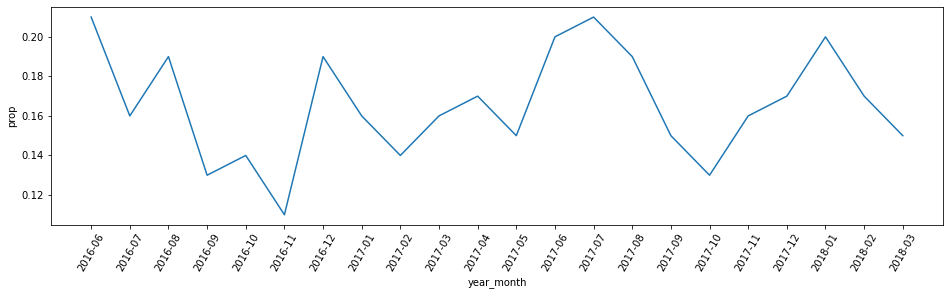

In [19]:
doc_prop = doc.groupby('year_month').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.lineplot(x = doc_prop.index, y = doc_prop.prop, data = doc_prop)

<AxesSubplot:xlabel='high_quality_flag', ylabel='byte_size'>

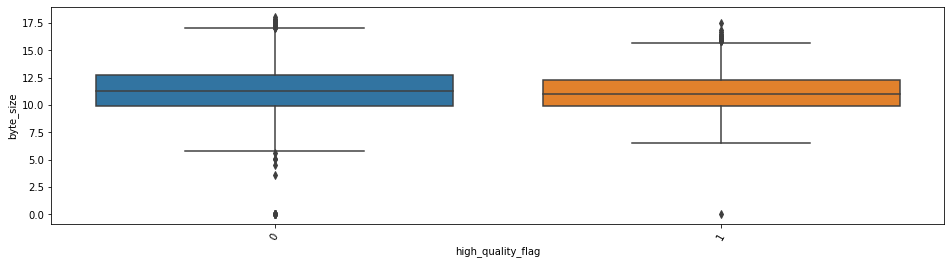

In [20]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.boxplot(x = doc.high_quality_flag, y = np.log(doc.byte_size + 1))

<AxesSubplot:xlabel='filetype', ylabel='prop'>

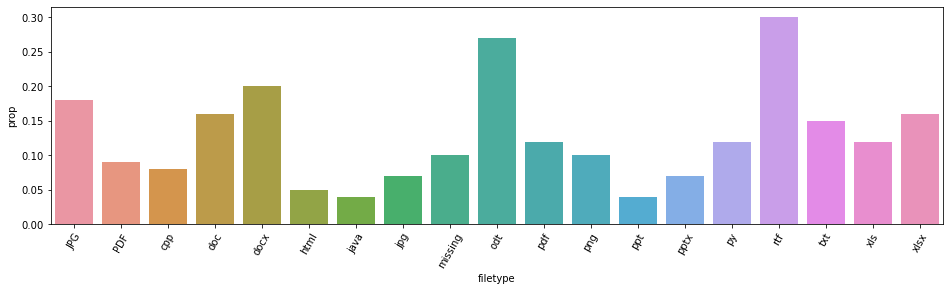

In [21]:
doc_prop = doc.groupby('filetype').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.prop != 0) & (doc_prop.New_ID >= 10)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='school_country', ylabel='prop'>

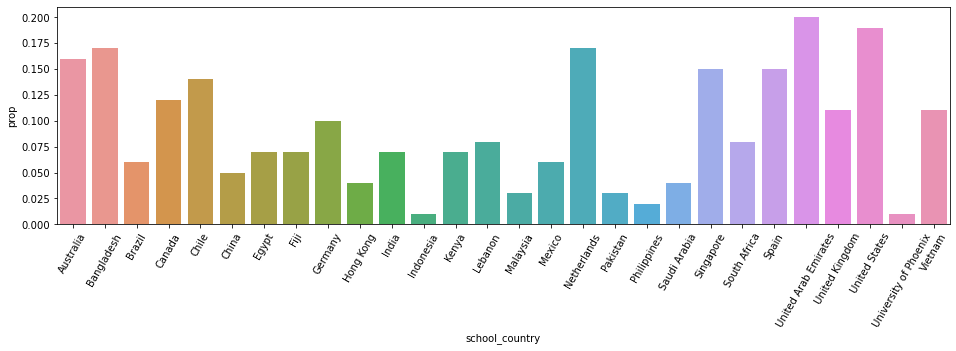

In [22]:
doc_prop = doc.groupby('school_country').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.prop != 0) & (doc_prop.New_ID >= 10)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='school_name', ylabel='prop'>

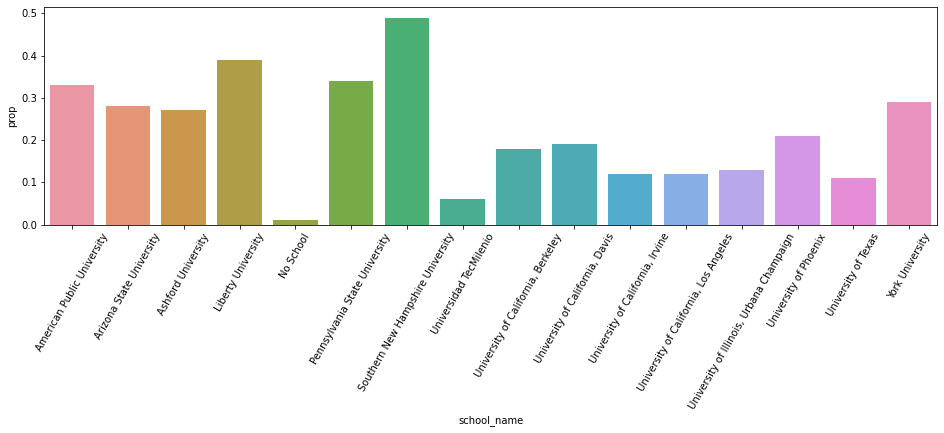

In [23]:
doc_prop = doc.groupby('school_name').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.prop != 0) & (doc_prop.New_ID >= 50)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y= doc_prop.prop)

<AxesSubplot:xlabel='school_type', ylabel='prop'>

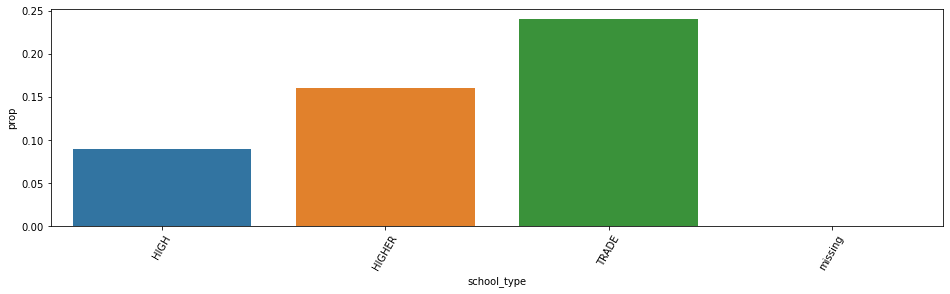

In [24]:
doc_prop = doc.groupby('school_type').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='high_quality_flag', ylabel='enrollment'>

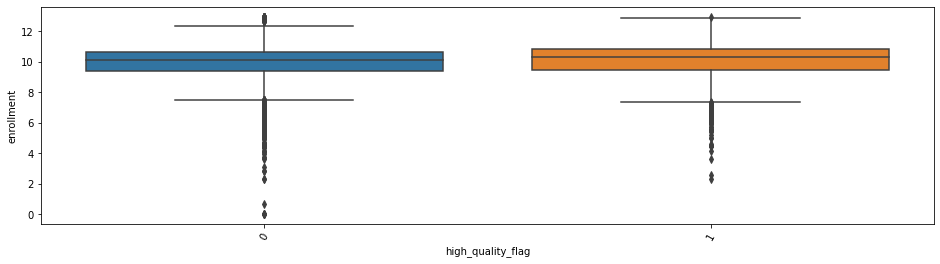

In [25]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.boxplot(x = doc.high_quality_flag, y= np.log(doc.enrollment+1))

<AxesSubplot:xlabel='first_subject_name', ylabel='prop'>

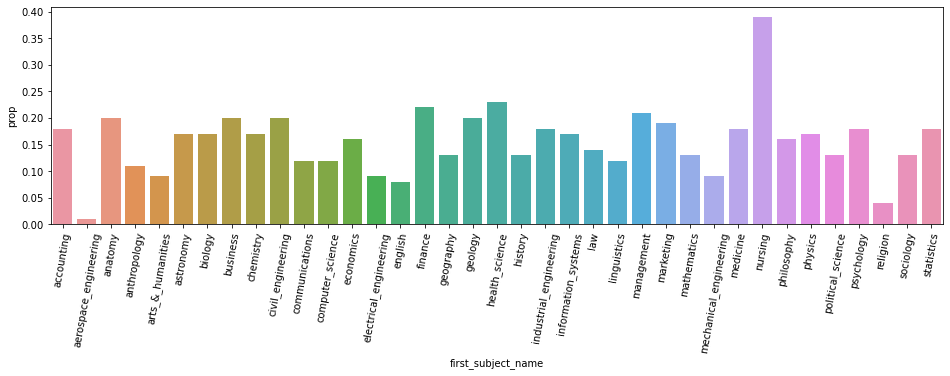

In [27]:
doc_prop = doc.groupby('first_subject_name').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.prop != 0) & (doc_prop.New_ID >= 10)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 80, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='tag', ylabel='prop'>

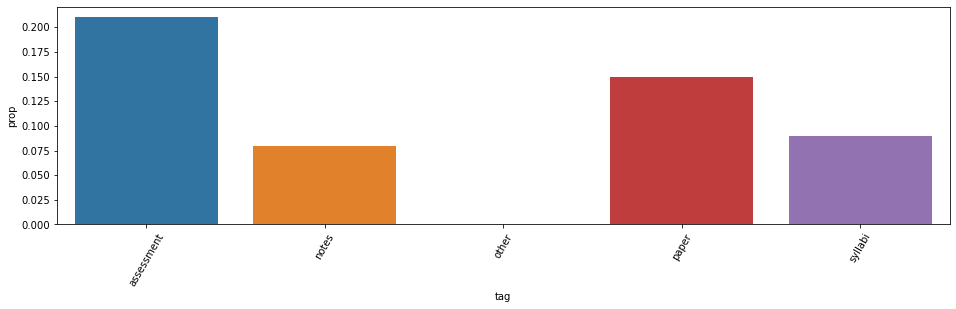

In [28]:
doc_prop = doc.groupby('tag').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

Text(0.5, 1.0, 'Page Count')

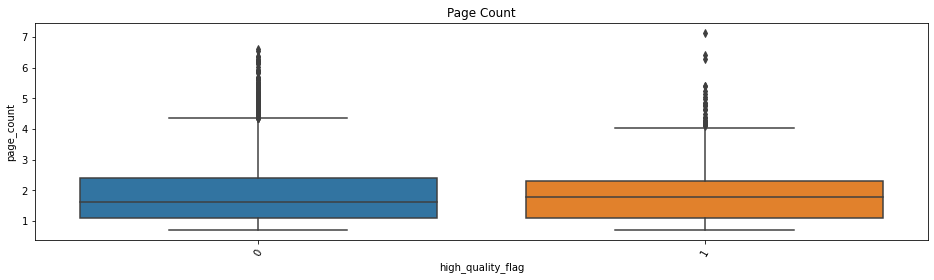

In [66]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.boxplot(x = doc.high_quality_flag, y = np.log(doc.page_count+1 ))
plt.title("Page Count")

In [30]:
doc.groupby('high_quality_flag').page_count.mean()

high_quality_flag
0    11.393683
1    10.299565
Name: page_count, dtype: float64

<AxesSubplot:xlabel='high_quality_flag', ylabel='hqd_score'>

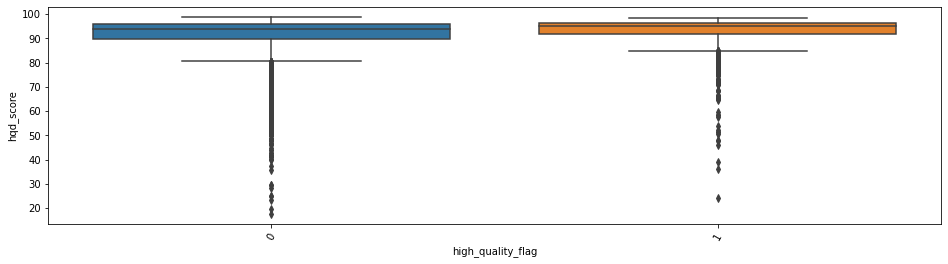

In [51]:
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.boxplot(x = doc.high_quality_flag, y = (doc.hqd_score*100))

<AxesSubplot:xlabel='top_keywords', ylabel='prop'>

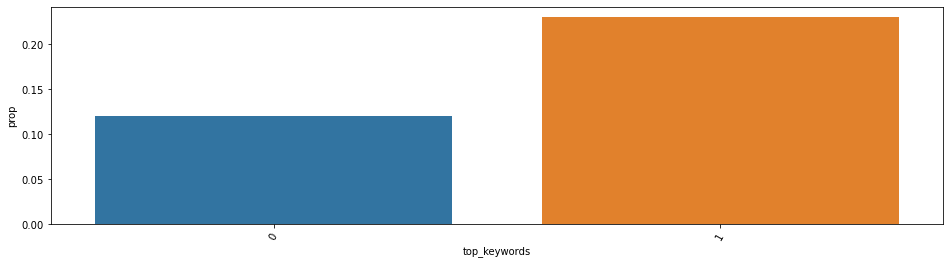

In [32]:
doc_prop = doc.groupby('top_keywords').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x = doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='language', ylabel='prop'>

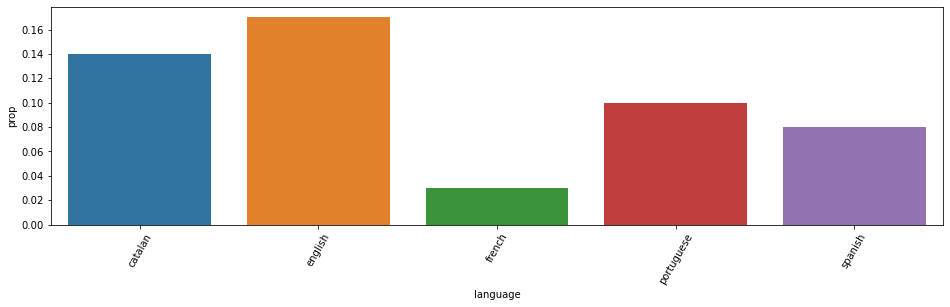

In [34]:
doc_prop = doc.groupby('language').agg({'high_quality_flag':'sum', 
                              'New_ID':'count'})
doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.prop != 0) & (doc_prop.New_ID >= 5)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x =doc_prop.index, y = doc_prop.prop)

<AxesSubplot:xlabel='school_country', ylabel='hqd_score'>

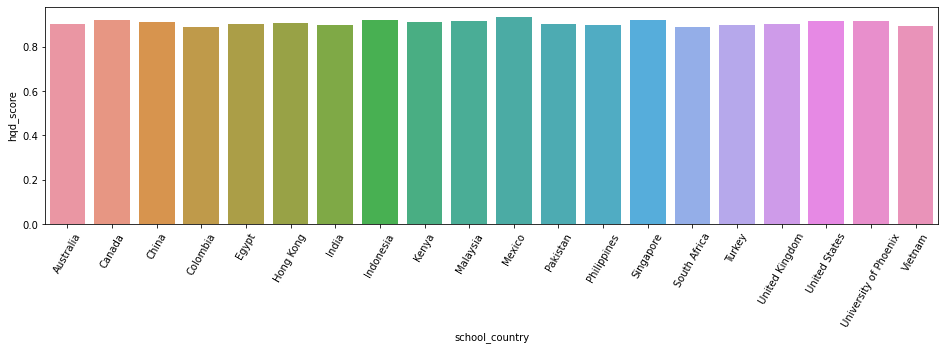

In [44]:
doc_prop = doc.groupby('school_country').agg({'hqd_score':'mean', 
                              'New_ID':'count'})
#doc_prop['prop'] = round(doc_prop.high_quality_flag/doc_prop.New_ID, 2)
doc_prop = doc_prop[(doc_prop.hqd_score != 0) & (doc_prop.New_ID >= 25)]
plt.figure(figsize = (16,4))
plt.xticks(rotation = 60, color = 'black')
sns.barplot(x =doc_prop.index, y = doc_prop.hqd_score)

In [70]:
# Checking how tags influence page count
doc.groupby('tag')['page_count'].mean()

tag
assessment     9.435911
notes         17.600000
other         93.500000
paper         10.453237
syllabi       15.014388
Name: page_count, dtype: float64

In [37]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [38]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

x = doc[['byte_size', 'filetype',
       'school_country', 'school_type', 
         'enrollment',
       'first_subject_name', 'tag', 
         'page_count', 'hqd_score',
         #'is_mcq',
       'top_keywords'
         ,'language']]

features_to_encode = ['filetype','school_country','school_type', 'first_subject_name', 'tag',
                     'language']
for feature in features_to_encode:
    res = encode_and_bind(x, feature)
    x = res
    print(feature)
    
x.fillna(0, inplace = True)

filetype
school_country
school_type
first_subject_name
tag
language


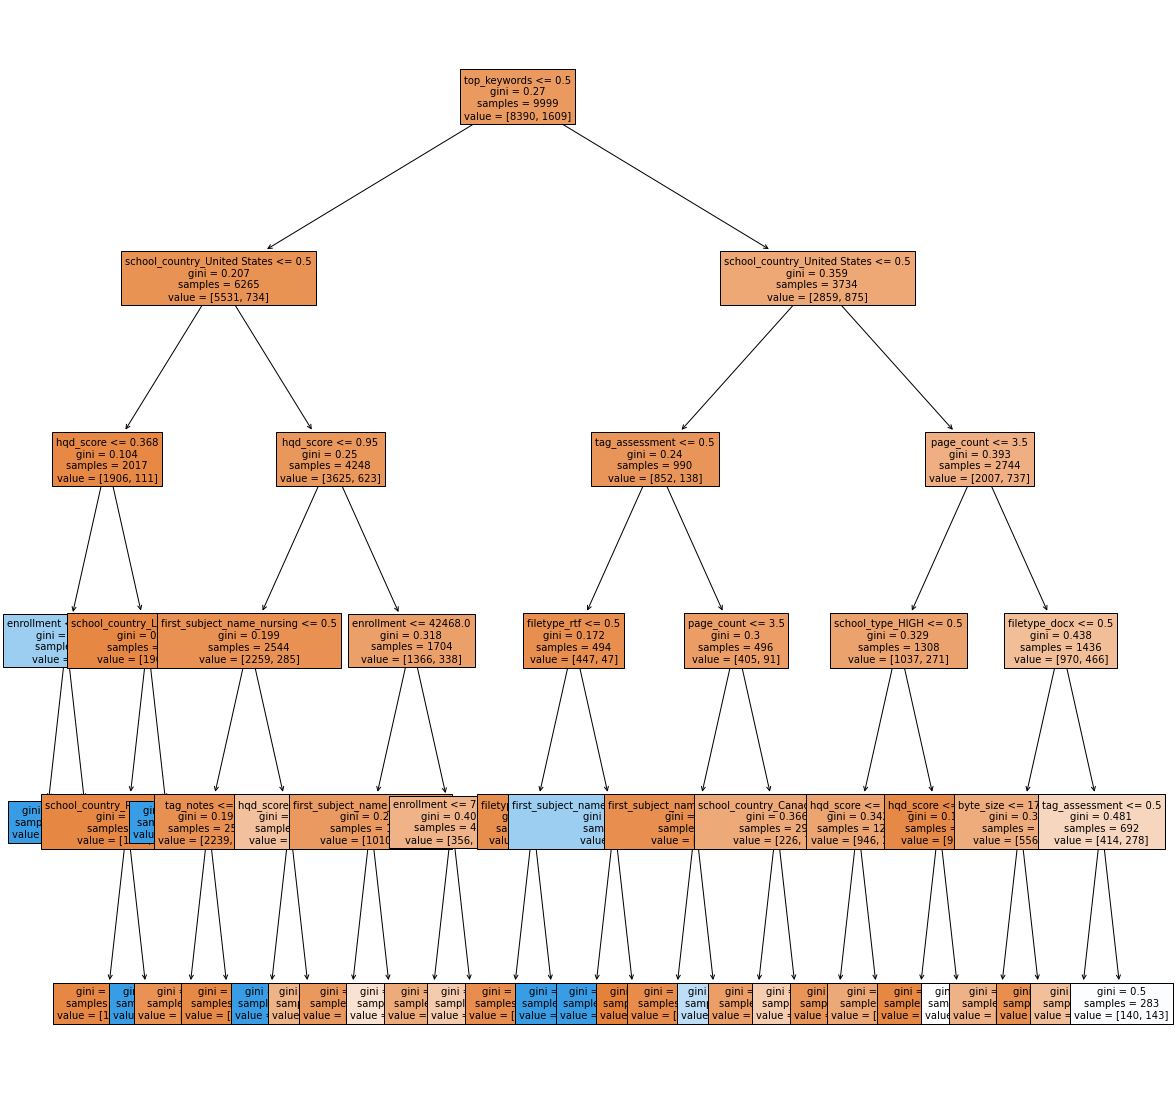

In [39]:
y = doc.high_quality_flag
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(x,y)

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, fontsize = 10, feature_names = x.columns, filled = True)

In [40]:
importance = clf.feature_importances_
# summarize feature importance
imp = {}
for i,v in enumerate(importance):
    imp[x.columns[i]] = round(v,2)
    
sorted(imp.items(), key=lambda item: item[1], reverse = True)[:10]


[('top_keywords', 0.27),
 ('school_country_United States', 0.2),
 ('page_count', 0.1),
 ('hqd_score', 0.1),
 ('filetype_docx', 0.07),
 ('enrollment', 0.06),
 ('tag_assessment', 0.06),
 ('byte_size', 0.03),
 ('school_country_Canada', 0.02),
 ('school_type_HIGH', 0.02)]